In [1]:
import sys
if sys.version=='2.7.9 (v2.7.9:648dcafa7e5f, Dec 10 2014, 10:10:46) \n[GCC 4.2.1 (Apple Inc. build 5666) (dot 3)]':
    pass
else:
    raise Warning('Python version may not be compatible with Galsim')

In [4]:
sys.path=[]

for i in ['/Users/myhome/Library/Python/2.7/lib/python/site-packages/','/usr/local/lib/','/usr/local/lib/wxPython-3.0.0.0/lib/python2.7/site-packages', '/usr/local/lib/wxPython-3.0.0.0/lib/python2.7/site-packages/wx-3.0-osx_cocoa', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python27.zip', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/plat-darwin', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/plat-mac', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/plat-mac/lib-scriptpackages', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/lib-tk', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/lib-old', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/lib-dynload', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/FontTools', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/VPython-6.11-py2.7-macosx-10.6-intel.egg', '/usr/local/lib/wxPython-3.0.0.0/lib/python2.7', '/Library/Python/2.7/site-packages', '/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python', '/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/PyObjC']:
    sys.path.append(i)
import galsim, os, math
from astropy.io import fits
import emcee
import pandas as pd
%pylab inline
import seaborn as sns; sns.set_style('darkgrid')
import pyccl as ccl

Populating the interactive namespace from numpy and matplotlib


/Users/myhome/py2_kernel/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['ndim']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [11]:
z = np.linspace(0., 3., 200)
i_lim = 26. # Limiting i-band magnitude
z0 = 0.0417*i_lim - 0.744

ell = np.arange(2, 3000)

Ngal = 46. * 100.31 * (i_lim - 25.) # Normalisation, galaxies/arcmin^2
pz = 1./(2.*z0) * (z / z0)**2. * np.exp(-z/z0) # Redshift distribution, p(z)
dNdz = Ngal * pz # Number density distribution

## Varying cold dark matter density $\Omega_c$

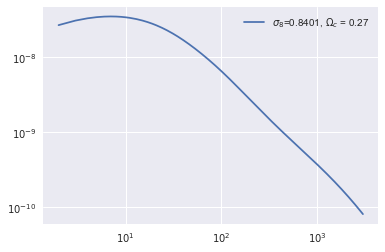

In [12]:
for Omega_c in [1]:
    p = ccl.Parameters(Omega_c=Omega_c*0.27, Omega_b=0.045, h=0.67, A_s=2.1e-9, n_s=0.96)
    cosmo = ccl.Cosmology(p, transfer_function='boltzmann')

    tracer1 = ccl.ClTracer(cosmo,tracer_type='lensing',n=[z,dNdz])
    tracer2 = ccl.ClTracer(cosmo,tracer_type='lensing',n=dNdz,z=z)

    cls = ccl.angular_cl(cosmo, tracer1, tracer2, ell)
    plt.plot(ell, cls, label=r'$\sigma_8$={:.4f}, $\Omega_c$ = {}'.format(ccl.sigma8(cosmo),Omega_c*0.27) )
    plt.legend()
    plt.xscale('log')
    plt.yscale('log')



## Varying the hubble parameter $h$

KeyboardInterrupt: 

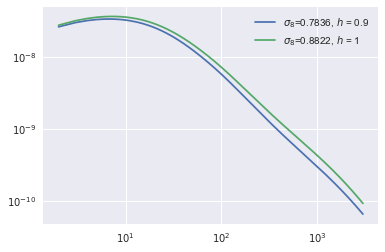

In [13]:
for h in [0.9,1,1.1]:
    p = ccl.Parameters(Omega_c=0.27, Omega_b=0.045, h=h*0.7, A_s=2.1e-9, n_s=0.96)
    cosmo = ccl.Cosmology(p, transfer_function='boltzmann')

    tracer1 = ccl.ClTracer(cosmo,tracer_type='lensing',n=[z,dNdz])
    tracer2 = ccl.ClTracer(cosmo,tracer_type='lensing',n=[z,dNdz])
    cls = ccl.angular_cl(cosmo, tracer1, tracer2, ell)
    plt.plot(ell, cls, label=r'$\sigma_8$={:.4f}, $h$ = {}'.format(ccl.sigma8(cosmo),h) )
    plt.legend()
    plt.xscale('log')
    plt.yscale('log')


## Varying Power Spectrum Normalisation $A_s$

In [ ]:
for A_s in [0.9,1,1.1]:
    p = ccl.Parameters(Omega_c=0.27, Omega_b=0.045, h=0.68, A_s=2.1e-9*A_s, n_s=0.96)
    cosmo = ccl.Cosmology(p, transfer_function='boltzmann')

    tracer1 = ccl.ClTracer(cosmo,tracer_type='lensing',n=[z,dNdz])
    tracer2 = ccl.ClTracer(cosmo,tracer_type='lensing',n=[z,dNdz])
    cls = ccl.angular_cl(cosmo, tracer1, tracer2, ell)
    plt.plot(ell, cls, label=r'$\sigma_8$={:.4f}, $A_s$ = {}'.format(ccl.sigma8(cosmo),2.1e-9*A_s) )
    plt.legend()
    plt.xscale('log')
    plt.yscale('log')


## Varying spectral index $n_s$

In [ ]:
for n_s in [0.9,1,1.1]:
    p = ccl.Parameters(Omega_c=0.27, Omega_b=0.045, h=0.68, A_s=2.1e-9, n_s=0.96*n_s)
    cosmo = ccl.Cosmology(p, transfer_function='boltzmann')

    tracer1 = ccl.ClTracer(cosmo,tracer_type='lensing',n=[z,dNdz])
    tracer2 = ccl.ClTracer(cosmo,tracer_type='lensing',n=[z,dNdz])
    cls = ccl.angular_cl(cosmo, tracer1, tracer2, ell)
    plt.plot(ell, cls, label=r'$\sigma_8$={:.4f}, $n_s$ = {}'.format(ccl.sigma8(cosmo),0.96*n_s) )
    plt.legend()
    plt.xscale('log')
    plt.yscale('log')


## Varying baryon density parameter $\Omega_b$

In [ ]:
for b in [0.9,1,1.1]:
    p = ccl.Parameters(Omega_c=0.27, Omega_b=0.045*b, h=0.68, A_s=2.1e-9, n_s=0.96)
    cosmo = ccl.Cosmology(p, transfer_function='boltzmann')

    tracer1 = ccl.ClTracer(cosmo,tracer_type='lensing',n=[z,dNdz])
    tracer2 = ccl.ClTracer(cosmo,tracer_type='lensing',n=[z,dNdz])
    cls = ccl.angular_cl(cosmo, tracer1, tracer2, ell)
    plt.plot(ell, cls, label=r'$\sigma_8$={:.4f}, $\Omega_b$ = {}'.format(ccl.sigma8(cosmo),0.045*b) )
    plt.legend()
    plt.xscale('log')
    plt.yscale('log')
 

## Varying $\sigma_8$ instead of $A_s$

In [ ]:
for sigma8 in [0.9,1,1.1]:
    p = ccl.Parameters(Omega_c=Omega_c*0.27, Omega_b=0.045, h=0.67, n_s=0.96, sigma8=sigma8)
    cosmo = ccl.Cosmology(p, transfer_function='boltzmann')

    tracer1 = ccl.ClTracer(cosmo,tracer_type='lensing',n=[z,dNdz])
    tracer2 = ccl.ClTracer(cosmo,tracer_type='lensing',n=dNdz,z=z)
    cls = ccl.angular_cl(cosmo, tracer1, tracer2, ell)
    plt.plot(ell, cls, label=r'$\sigma_8$={:.4f}'.format(sigma8) )
    plt.legend()
    plt.xscale('log')
    plt.yscale('log')


Weak lensing is mostly sensitive to a combination of $\Omega_m$ and $\sigma_8$ where  $\sigma_8 \Omega_m^\alpha \approx Constant$; where $\alpha \approx 0.6$ Since $\Omega_c$ provides the larger contribution to  $\Omega_m$; I'll use  $\sigma_8 \Omega_c^\alpha$. 

Using standard values, $\Omega_c = 0.27$, and $\sigma_8 = 0.834$, we can solve  $\sigma_8 \Omega_m^\alpha \approx 0.380$ and use values for both around the standard values to keep this expression constant. We would expect the shear power spectrum to remain approximately constant.

3.29731235737e-08
2.66394918788e-08
2.00173934812e-08


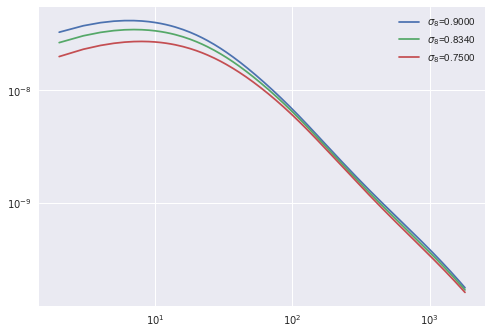

In [41]:
for sigma8,Omega_c in zip([0.9,0.834,0.75],[0.238,0.27,0.322]):
    p = ccl.Parameters(Omega_c=Omega_c, Omega_b=0.045, h=0.67, n_s=0.96, sigma8=sigma8)
    cosmo = ccl.Cosmology(p, transfer_function='boltzmann')

    tracer1 = ccl.ClTracer(cosmo,tracer_type='lensing',n=[z,dNdz])
    tracer2 = ccl.ClTracer(cosmo,tracer_type='lensing',n=dNdz,z=z)
    cls = ccl.angular_cl(cosmo, tracer1, tracer2, ell)
    plt.plot(ell, cls, label=r'$\sigma_8$={:.4f}'.format(sigma8))
    plt.legend()
    plt.xscale('log')
    plt.yscale('log')
    print cls[0]

In [72]:
import emcee
data_path = '../../PittAstro/cov_LSST_data_Cl 2/'
cov_file = np.loadtxt(data_path+'cov_LSST_lmax500')


24888944.1924
117977.010295
2267023.84538
29879828.7068
24534.613736
22036996.9407
1261725.52479
903214.856964
34488844.1528
3978.94810804
1821062.44268
68468919.5203
45639.9141917
36936363.041
1396621.50415
59765.5379706
21747814.1137
2460812.87119
788400.243409
48441822.0578
1185.85371215
22193668.8901
287794.689797
1002476.13747
40920038.6224
2748.52666437
627253.929229
34487784.5296
16144.5003372
25714099.3947
7603112.65636
50037.783043
86365129.0186
92701.9977056
225977.180364
23700673.5345
2022012.65228
22086133.925
1006585.21259
308.801098799
13276537.6966
40894.8988581
462399.555663
11531180.4602
1166.8259262
7706435.2967
3025850.79426
290.018506841
19714239.6919
3356.13605139
1641464.97989
10645219.0091
78836.0969453
14768949.3476
196681.135665
10383.392108
28644755.7275
3130.9796885
107394.688755
8159555.63176
6273397.08712
7888784.24113
69688.8268923
5874.83916764
30304212.6231
5289078.07874
853920.508453
10379025.4019
8069499.87404
5254333.77828
294381.005314
279761.285842


(array([ 137.,   23.,    8.,    5.,    6.,    8.,    1.,    0.,   10.,    2.]),
 array([ 0.26998034,  0.27031216,  0.27064399,  0.27097581,  0.27130764,
         0.27163946,  0.27197129,  0.27230311,  0.27263494,  0.27296677,
         0.27329859]),
 <a list of 10 Patch objects>)

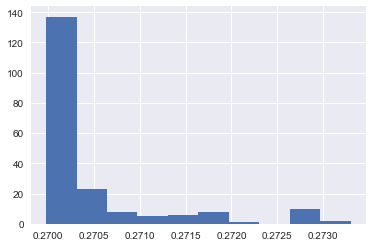

In [88]:
# First, define the probability distribution that you would like to sample.
cov = reshape(cov_file[:,2],(1810,1810))
z = np.linspace(0., 3., 200)
i_lim = 26. # Limiting i-band magnitude
z0 = 0.0417*i_lim - 0.744

ell = np.arange(2, 1812)

Ngal = 46. * 100.31 * (i_lim - 25.) # Normalisation, galaxies/arcmin^2
pz = 1./(2.*z0) * (z / z0)**2. * np.exp(-z/z0) # Redshift distribution, p(z)
dNdz = Ngal * pz # Number density distribution
p = ccl.Parameters(Omega_c=0.27, Omega_b=0.045, h=0.67, n_s=0.96,  A_s=2.1e-9)
cosmo = ccl.Cosmology(p, transfer_function='boltzmann')

tracer1 = ccl.ClTracer(cosmo,tracer_type='lensing',n=[z,dNdz])
tracer2 = ccl.ClTracer(cosmo,tracer_type='lensing',n=dNdz,z=z)
data    = ccl.angular_cl(cosmo, tracer1, tracer2, ell)
icov = np.linalg.inv(cov)
def lnprob(theta):
    
    z = np.linspace(0., 3., 200)
    i_lim = 26. # Limiting i-band magnitude
    z0 = 0.0417*i_lim - 0.744

    ell = np.arange(2, 1812)

    Ngal = 46. * 100.31 * (i_lim - 25.) # Normalisation, galaxies/arcmin^2
    pz = 1./(2.*z0) * (z / z0)**2. * np.exp(-z/z0) # Redshift distribution, p(z)
    dNdz = Ngal * pz # Number density distribution
    for i in range(len(theta)):
        p = ccl.Parameters(Omega_c=theta[0], Omega_b=0.045, h=0.67, n_s=0.96,  A_s=theta[1])
        cosmo = ccl.Cosmology(p, transfer_function='boltzmann')

        tracer1 = ccl.ClTracer(cosmo,tracer_type='lensing',n=[z,dNdz])
        tracer2 = ccl.ClTracer(cosmo,tracer_type='lensing',n=dNdz,z=z)
        theory = ccl.angular_cl(cosmo, tracer1, tracer2, ell)
        diff = data-theory
    print np.dot(diff,np.dot(icov,diff))/2.0
    return -np.dot(diff,np.dot(icov,diff))/2.0



# We'll sample a 10-dimensional Gaussian...
ndim = 2

nwalkers = 8

# Choose an initial set of positions for the walkers.
# p0 = [np.random.rand(ndim) for i in xrange(nwalkers)]
# p0 = emcee.utils.sample_ball(np.ones(ndim)*0.27,np.ones(ndim)*0.01,size=nwalkers)
# p1 = emcee.utils.sample_ball(np.ones(ndim)*2.1e-9,np.ones(ndim)*1.E-10,size=nwalkers)
# p00 = (p0,p1)
p00 = [np.array([0.27,2.1e-9])*np.ones(ndim)+np.array([0.02,1.e-10]) * numpy.random.rand() for i in range(nwalkers)] 
# Initialize the sampler with the chosen specs.
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob)

# Run 5000 steps as a burn-in.
pos, prob, state = sampler.run_mcmc(p00, 25)

# Reset the chain to remove the burn-in samples.
sampler.reset()

# Starting from the final position in the burn-in chain, sample for 100000
# steps.
sampler.run_mcmc(pos, 25, rstate0=state)

# Print out the mean acceptance fraction. In general, acceptance_fraction
# has an entry for each walker so, in this case, it is a 50-dimensional
# vector.
#print "Mean acceptance fraction:", np.mean(sampler.acceptance_fraction)

# Estimate the integrated autocorrelation time for the time series in each
# parameter.
#print "Autocorrelation time:", sampler.get_autocorr_time()

plt.hist(sampler.flatchain[:,0], 10)


In [70]:
def lnprob(theta):
#     for i in range(len(theta)):
#         print i,theta[i]

    print 'theta',theta

    a = theta[0]
    b = theta[1]
    print a,b


ndim = 2

nwalkers = 4

p0 = emcee.utils.sample_ball(np.ones(ndim)*0.27,np.ones(ndim)*0.01,size=nwalkers)
p1 = emcee.utils.sample_ball(np.ones(ndim)*2.1e-9,np.ones(ndim)*1.E-10,size=nwalkers)
p00 = [np.array([0.27,2.1e-9])*np.ones(ndim)+np.array([0.02,1.e-10]) * numpy.random.rand() for i in range(nwalkers)] 
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob)
print p00[0][0]
pos, prob, state = sampler.run_mcmc(p00, 20)

sampler.reset()

sampler.run_mcmc(pos, 20, rstate0=state)

plt.hist(sampler.flatchain[:,0], 10)



0.27184423945
theta [  2.71844239e-01   2.10922120e-09]
0.27184423945 2.10922119725e-09
theta [  2.73048713e-01   2.11524357e-09]
0.273048713338 2.11524356669e-09
theta [  2.85554854e-01   2.17777427e-09]
0.285554853606 2.17777426803e-09
theta [  2.75594721e-01   2.12797361e-09]
0.275594721488 2.12797360744e-09


TypeError: float() argument must be a string or a number

In [89]:
samples = sampler.chain[:, 5:, :].reshape((-1, ndim))


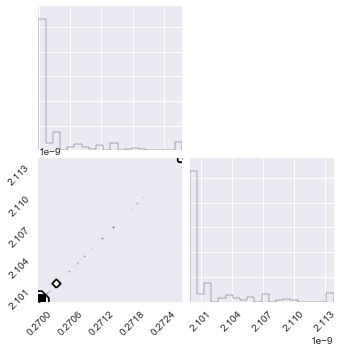

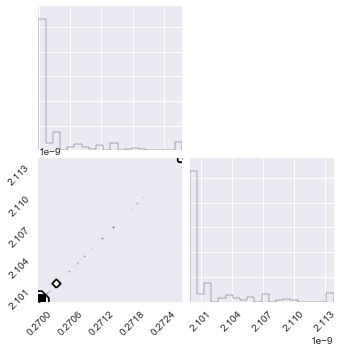

In [90]:
import corner
corner.corner(samples)

In [87]:
np.ones(ndim)

array([ 1.,  1.,  1.,  1.])

In [91]:
samples

array([[  2.71429967e-01,   2.10714984e-09],
       [  2.71429967e-01,   2.10714984e-09],
       [  2.71429967e-01,   2.10714984e-09],
       [  2.71429967e-01,   2.10714984e-09],
       [  2.71429967e-01,   2.10714984e-09],
       [  2.71429967e-01,   2.10714984e-09],
       [  2.70810367e-01,   2.10405184e-09],
       [  2.70737254e-01,   2.10368627e-09],
       [  2.70735398e-01,   2.10367699e-09],
       [  2.70735398e-01,   2.10367699e-09],
       [  2.70564475e-01,   2.10282238e-09],
       [  2.70564475e-01,   2.10282238e-09],
       [  2.70564475e-01,   2.10282238e-09],
       [  2.70099139e-01,   2.10049570e-09],
       [  2.70049403e-01,   2.10024702e-09],
       [  2.70049403e-01,   2.10024702e-09],
       [  2.70049403e-01,   2.10024702e-09],
       [  2.70018293e-01,   2.10009146e-09],
       [  2.70016356e-01,   2.10008178e-09],
       [  2.70016094e-01,   2.10008047e-09],
       [  2.70139566e-01,   2.10069783e-09],
       [  2.70139566e-01,   2.10069783e-09],
       [  

In [93]:
map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
                             zip(*np.percentile(samples, [2.5, 50, 97.5],
                                                axis=0)))

[(0.2700239030373921, 0.0027411829263394027, 3.9793579315106076e-05),
 (2.1001195151869606e-09, 1.3705914631697055e-11, 1.9896789657505737e-13)]

In [94]:
shape(samples)

(160, 2)

In [144]:
means = [0.27,2.1e-9]
stds  = [[0.00001,0],[0,1.0e-23]]
randar = numpy.random.multivariate_normal(means, stds,500)

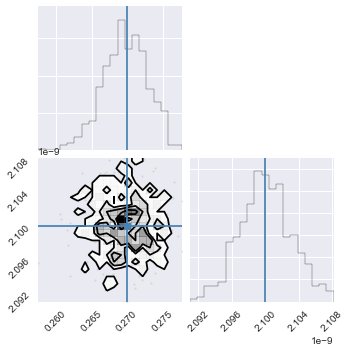

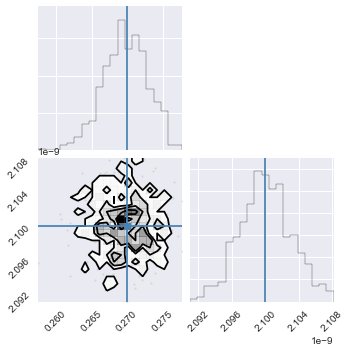

In [147]:
corner.corner(randar, truths = [0.27,2.1e-9])

In [156]:
samplar = samples.copy()

In [166]:
samplar1 = np.append(samplar[:,1],samplar[:,1])

In [170]:
shape([samplar1,samplar2])

(2, 320)

In [128]:
samplar = np.array(samplar).ravel()

In [155]:
samplar

array([  2.71429967e-01,   2.10714984e-09,   2.71429967e-01,
         2.10714984e-09,   2.71429967e-01,   2.10714984e-09,
         2.71429967e-01,   2.10714984e-09,   2.71429967e-01,
         2.10714984e-09,   2.71429967e-01,   2.10714984e-09,
         2.70810367e-01,   2.10405184e-09,   2.70737254e-01,
         2.10368627e-09,   2.70735398e-01,   2.10367699e-09,
         2.70735398e-01,   2.10367699e-09,   2.70564475e-01,
         2.10282238e-09,   2.70564475e-01,   2.10282238e-09,
         2.70564475e-01,   2.10282238e-09,   2.70099139e-01,
         2.10049570e-09,   2.70049403e-01,   2.10024702e-09,
         2.70049403e-01,   2.10024702e-09,   2.70049403e-01,
         2.10024702e-09,   2.70018293e-01,   2.10009146e-09,
         2.70016356e-01,   2.10008178e-09,   2.70016094e-01,
         2.10008047e-09,   2.70139566e-01,   2.10069783e-09,
         2.70139566e-01,   2.10069783e-09,   2.70139566e-01,
         2.10069783e-09,   2.70139566e-01,   2.10069783e-09,
         2.70109072e-01,

In [176]:
mean(samples[0]-2.1e-9)

0.13571498257839534

In [182]:
samples1cop = samples[:,0]-0.002

In [184]:
samples2cop = samples[:,1]-0.005e-9

array([  2.10214984e-09,   2.10214984e-09,   2.10214984e-09,
         2.10214984e-09,   2.10214984e-09,   2.10214984e-09,
         2.09905184e-09,   2.09868627e-09,   2.09867699e-09,
         2.09867699e-09,   2.09782238e-09,   2.09782238e-09,
         2.09782238e-09,   2.09549570e-09,   2.09524702e-09,
         2.09524702e-09,   2.09524702e-09,   2.09509146e-09,
         2.09508178e-09,   2.09508047e-09,   2.09569783e-09,
         2.09569783e-09,   2.09569783e-09,   2.09569783e-09,
         2.09554536e-09,   2.09544200e-09,   2.09544200e-09,
         2.09539793e-09,   2.09539793e-09,   2.09539793e-09,
         2.09539793e-09,   2.09539793e-09,   2.09539793e-09,
         2.09539793e-09,   2.09522368e-09,   2.09517902e-09,
         2.09514376e-09,   2.09514376e-09,   2.09509527e-09,
         2.09509527e-09,   2.09503580e-09,   2.09503580e-09,
         2.09503580e-09,   2.09503580e-09,   2.09503580e-09,
         2.09504449e-09,   2.09504843e-09,   2.09502181e-09,
         2.09502181e-09,

In [185]:
samplesss = np.append(samples,randar)

In [186]:
samplesss

array([  2.71429967e-01,   2.10714984e-09,   2.71429967e-01, ...,
         2.10412813e-09,   2.69562705e-01,   2.09790636e-09])

In [189]:
samples0 = samplesss[0:-1:2]

In [190]:
samples0

array([ 0.27142997,  0.27142997,  0.27142997,  0.27142997,  0.27142997,
        0.27142997,  0.27081037,  0.27073725,  0.2707354 ,  0.2707354 ,
        0.27056448,  0.27056448,  0.27056448,  0.27009914,  0.2700494 ,
        0.2700494 ,  0.2700494 ,  0.27001829,  0.27001636,  0.27001609,
        0.27013957,  0.27013957,  0.27013957,  0.27013957,  0.27010907,
        0.2700884 ,  0.2700884 ,  0.27007959,  0.27007959,  0.27007959,
        0.27007959,  0.27007959,  0.27007959,  0.27007959,  0.27004474,
        0.2700358 ,  0.27002875,  0.27002875,  0.27001905,  0.27001905,
        0.27000716,  0.27000716,  0.27000716,  0.27000716,  0.27000716,
        0.2700089 ,  0.27000969,  0.27000436,  0.27000436,  0.27000436,
        0.2700046 ,  0.2700046 ,  0.27000416,  0.27000458,  0.2699992 ,
        0.2699992 ,  0.26999944,  0.26999944,  0.26999944,  0.26999878,
        0.27035646,  0.27035646,  0.27035646,  0.27035646,  0.27035646,
        0.27032194,  0.27032194,  0.27032194,  0.27032194,  0.27

In [191]:
samples1 = samplesss[1:-1:2]

In [192]:
samples1

array([  2.10714984e-09,   2.10714984e-09,   2.10714984e-09,
         2.10714984e-09,   2.10714984e-09,   2.10714984e-09,
         2.10405184e-09,   2.10368627e-09,   2.10367699e-09,
         2.10367699e-09,   2.10282238e-09,   2.10282238e-09,
         2.10282238e-09,   2.10049570e-09,   2.10024702e-09,
         2.10024702e-09,   2.10024702e-09,   2.10009146e-09,
         2.10008178e-09,   2.10008047e-09,   2.10069783e-09,
         2.10069783e-09,   2.10069783e-09,   2.10069783e-09,
         2.10054536e-09,   2.10044200e-09,   2.10044200e-09,
         2.10039793e-09,   2.10039793e-09,   2.10039793e-09,
         2.10039793e-09,   2.10039793e-09,   2.10039793e-09,
         2.10039793e-09,   2.10022368e-09,   2.10017902e-09,
         2.10014376e-09,   2.10014376e-09,   2.10009527e-09,
         2.10009527e-09,   2.10003580e-09,   2.10003580e-09,
         2.10003580e-09,   2.10003580e-09,   2.10003580e-09,
         2.10004449e-09,   2.10004843e-09,   2.10002181e-09,
         2.10002181e-09,

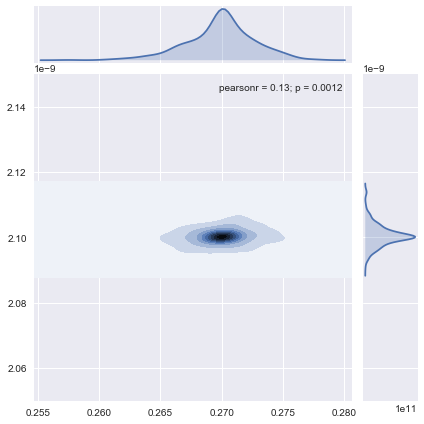

In [212]:
sns.jointplot(samples0,samples1,ylim=(2.05e-9,2.15e-9),kind='kde')

In [202]:
samples0 = np.delete(samples0,samples0[len(samples0)-1])

/Users/myhome/py2_kernel/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  if __name__ == '__main__':


In [203]:
len(samples0)

659

In [205]:
samples1

array([  2.10714984e-09,   2.10714984e-09,   2.10714984e-09,
         2.10714984e-09,   2.10714984e-09,   2.10714984e-09,
         2.10405184e-09,   2.10368627e-09,   2.10367699e-09,
         2.10367699e-09,   2.10282238e-09,   2.10282238e-09,
         2.10282238e-09,   2.10049570e-09,   2.10024702e-09,
         2.10024702e-09,   2.10024702e-09,   2.10009146e-09,
         2.10008178e-09,   2.10008047e-09,   2.10069783e-09,
         2.10069783e-09,   2.10069783e-09,   2.10069783e-09,
         2.10054536e-09,   2.10044200e-09,   2.10044200e-09,
         2.10039793e-09,   2.10039793e-09,   2.10039793e-09,
         2.10039793e-09,   2.10039793e-09,   2.10039793e-09,
         2.10039793e-09,   2.10022368e-09,   2.10017902e-09,
         2.10014376e-09,   2.10014376e-09,   2.10009527e-09,
         2.10009527e-09,   2.10003580e-09,   2.10003580e-09,
         2.10003580e-09,   2.10003580e-09,   2.10003580e-09,
         2.10004449e-09,   2.10004843e-09,   2.10002181e-09,
         2.10002181e-09,

In [211]:
sns.jointplot?